In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()



[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/owner/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
thaiVilla = pd.read_excel('combinedreviews.xlsx').drop(columns = ['Unnamed: 0'])
thaiVilla['Date'] = pd.to_datetime(thaiVilla['Date'])

In [3]:
thaiVilla

,Friends,Name,Rating,Review,UserReviews,Photos,Date
0,31,Christopher W.,4,I gave this lovely place a visit to try out th...,22,65,2021-08-22
1,304,yiannis p.,1,"I like the food, here, & the cashier was very ...",52,51,2021-09-29
2,14,Ray K.,3,Experienced Black Tap for the first time durin...,48,75,2021-07-30
3,306,Trendy D.,3,You can't make reservations so expect to wait ...,164,674,2021-07-11
4,16,Anel M.,4,I came here with my daughter just for the shak...,44,117,2021-07-17
...,...,...,...,...,...,...,...
7214,0,Stephanie M.,2,The food at Thai Villa is amazing. I've been h...,1,0,2016-12-15
7215,0,Steve S.,5,Reviews are spot on. Make a reservation otherw...,36,63,2016-12-14
7216,0,Linda R.,5,"This place is amazing, the interior makes you ...",1,0,2016-12-05
7217,0,P C.,3,This place has nice atmosphere and the food ha...,6,0,2016-11-08


In [4]:

thaiMenu = {'CLASSIC BENTO BOX',
 'POWER BENTO BOX',
 'SUSHI SELECTION',
 'SASHIMI SELECTION',
 'Toro Tartare with Caviar',
 'Salmon or Yellowtail Tartare',
 'Sashimi Salad with Matsuhisa Dressing',
 'Lobster Shiitake Salad with Spicy Lemon Dressing',
 'Yellowtail Jalapeno',
 'Tiradito',
 'Tuna Tataki with Tosazu',
 'New Style Sashimi',
 'Fluke Sashimi Dry Miso',
 'Crispy Rice with Spicy Tuna',
 'Baby Spinach Salad with Dry Miso & Grilled Shrimp',
 'Baby Spinach Salad with Lobster',
 'Black Cod with Miso',
 'Black Cod Butter Lettuce',
 "Squid 'Pasta' with Light Garlic Sauce",
 'Rock Shrimp Tempura with Creamy Spicy Sauce or Ponzu',
 'King Crab Tempura Amazu Ponzu',
 'Lobster Wasabi Pepper',
 'Chicken',
 'Grilled Salmon',
 'Beef Tenderloin',
 'Tofu & Vegetables Spicy Garlic',
 'Miso Soup with Tofu',
 'Edamame',
 'Edamame Choclo',
 'Shishito Sea Salt',
 'Shishito Den Miso',
 'Vegetable',
 'Tuna',
 'Salmon',
 'King Crab',
 'Lobster',
 'Wagyu',
 'Field Greens',
 'Shiitake Salad with Spicy Lemon Dressing',
 'Baby Spinach Salad with Dry Miso',
 'Crispy Rice with Spicy Avocado',
 'Eggplant with Miso',
 'Roasted Cauliflower Jalapeno Salsa',
 'Shojin - Vegetable Tempura Selection',
 'Warm Mushroom Salad',
 'Tofu New Style',
 'Tuna',
 'Toro',
 'Salmon',
 'Yellowtail',
 'Fluke',
 'Japanese Red Snapper',
 'Shrimp',
 'Snow Crab',
 'King Crab',
 'Scallop',
 'Octopus',
 'Japanese Eel',
 'Japanese Sea Urchin',
 'Smelt Eggs',
 'Salmon Eggs',
 'Tamago',
 'Wagyu',
 'BENTO BOX',
 'BANANA SOY TOBAN',
 'WHISKY CAPPUCCINO',
 'SOBA CHA BROWNIE',
 'DOWNTOWN CHEESECAKE',
 'PINEAPPLE COCONUT CAKE',
 'HOUSE-MADE GELATO OR SORBET',
 'MOCHI ICE CREAM',
 'Coffee',
 'Espresso',
 'Americano',
 'Macchiato',
 'Cortado',
 'Cappuccino',
 'Cafe Latte',
 'HOJICHAWarm smoky notes with hints of caramel',
 'BLACK ORCHIDYlang ylang flower scented, with smooth vanilla & mandarin notes',
 'NOBU SHISOCaptivating fragrance of shiso leaf, delicate sweetness, subtle character',
 'SOBACHA (Caffeine-Free)Rich malty and nutty aroma with a smooth buttery finish',
 'LEMONGRASS GINGER (Caffeine-Free)Aromatic lemongrass, balanced with warm, spicy ginger',
 'SOOTHE (Caffeine-Free)Comforting floral note with relaxing minty scent',
 'Chips & Salsa',
 'Classic Guacamole',
 'Tito Santana Guacamole',
 'Nacho Mama',
 'Macho Nacho',
 'Queso Fundido con Carne',
 'Queso Fundido con Hongos',
 'Tortilla Soup',
 'Chopped Salad',
 'Kale Salad',
 "Tijuana's Original Caesar",
 'Vuelva a la Vida',
 'Mezcal Cured Salmon',
 'Snapper Aguachile',
 'Tuna Tostadas',
 'Crab Tostadas',
 'Zucchini Blossom & Corn Quesadillas',
 'Chicken Quesadillas',
 'Huitlacoche Quesadillas',
 'Black Bean Tlayuda',
 'Milanesa',
 'Burger',
 'Chicken Enchiladas',
 'Black Bean Enchiladas',
 'Oxtail Enchiladas',
 'Crab Enchiladas',
 'Chipotle Chicken Burrito',
 'Beef Burrito',
 'Achiote Grilled Chicken',
 'Grilled Skirt Steak',
 'Grilled Shrimp',
 'Grilled Lamb Tenderloin & Merguez Sausage',
 'Combination of Two',
 'Combination of Three',
 'Crispy Mahi Mahi Tacos',
 'Lamb "Arabes" Tacos',
 'Carnitas Tacos',
 'Chicken Tacos',
 'Cauliflower Tacos',
 'Tacos Al Pastor',
 'Steak Tacos',
 'Grilled Fish Tacos',
 'Shrimp Tacos',
 'Grilled Corn on the Cob',
 'Watermelon & Cucumber Salad',
 'Green Beans',
 'Refried Black Beans',
 'Black Beans & Rice',
 'Plantains con Queso',
 'Functional and analytics cookies',
 'Targeting cookies',
 'all american burger',
   'texan burger',
   'mexico city',
   'impossible all american',
   'greg norman',
   'mulberry street burger',
   'wagyu steakhouse burger',
   'smokehouse turkey burger',
   'black tap burger salad',
   'crispy chicken caesar salad',
   'korean bbq',
   'nashville hot',
   'crispy chicken sandwich',
   'pesto chicken sandwich',
   'idaho fries',
   'sweet potato fries',
   'queso',
   'chips',
   'guac',
   'brussels sprouts',
   'fried chicken tenders',
   'teriyaki broccoli',
   'fried mozz',
   'korean bbq cauliflower',
   'caesar salad',
   'house salad',
   'arugala salad',
   'cotton candy',
   'cakeshake',
   'cookies n cream supreme',
   'vegan black n white cakeshake',
   'bam bam shake',
   'cookie shake',
   'strawberry shortcake',
   'brooklyn blackout',
   'sweet n salty',
   'chocolate',
   'vanilla',
   'coffee',
   'black cherry',
   'strawberry',
   'nutella',
   'peanut butter',
   'oreo cookies & cream',
   'blueberry pie',
   'vegan key lime pie',
   'cake batter',
   'salted dulce de leche',
   'one brooklyn blackout & one cakeshake',
   'two cakeshakes',
   'brooklyn blackout',
   'brooklyn lager',
   'blone ale',
   'blue moon',
   'single cut plaintop silver',
   'imperial ipa',
   'downeast original cider',
   'chaser ipa',
   'barrier money',
   'zero gravity ale',
   'pilsner',
   'slighty mighty',
   'seaquench',
    'high life',
   'lager',
   'blonde ale',
   'rose cider',
   'wine',
   'lemonade',
   'margarita',
   'sangria',
   'black tap mule',
   'creamsicle',
   'saratoga still',
   'topo chico',
   'soda',
    'Meatballs',
 'Side Salad - Insalatina',
 'Prosciutto and Mozzarella',
 'Housemade Focaccia',
 'Burrata',
 'Prosciutto San Daniele',
 'Soppressata - Sweet',
 'Soppressata - Spicy',
 'Housemade Focaccia -Black Truffle',
 'Housemade Focaccia - Black Pepper and Cheese',
 'Otto Tondo Bread',
 'Bruschetta Ricotta e Tartufo',
 'Chickpea Salad',
 'Kale and Quinoa Salad',
 'Gem Lettuce and Tuna Salad',
 'Autunnale',
 'Agnolotti del Plin',
 'Spaghetti al Pomodoro',
 'Bucatini allAmatriciana',
 'Tagliatelle with Bolognese Rag',
 'Classic Lasagna',
 'Ravioli di Zucca',
 'Vesuvio with Sausage and Rapini',
 'Pappardelle al Ragu di Funghi e Tartufo',
 'Marinara Pizza',
 'Margherita Verace Pizza',
 'Four Cheese (Quattro Formaggi) Pizza',
 'Spicy Salami (Massese) Pizza',
 'Italian Sausage (Salsicciota) Pizza',
 'Squash and Pancetta Pizza (Zuccarella)',
 'Calzone Classico',
 'Burrata and Broccoli Rabe Pizza (Burratona)',
 'Eggplant Parmigiana Pizza',
 'Capricciosa Pizza',
 'Classic Tiramisu',
 'Cioccolato',
 'Profiteroles',
 'Panna Cotta with Fresh Berries',
 'Loacker Quadratini (8.8 oz.)',
 'Bjorn Qorn',
 'Lurisia Still Water (16.9 oz.)',
 'Lurisia Sparkling Water (16.9 oz.)',
 'Lurisia Still Water (33.8 oz.)',
 'Lurisia Sparkling Water (33.8 oz.)',
 'Lurisia Gazzosa (9.3 oz.)',
 'Mole Cola (12.8 oz.)',
 'Mole Cola Senza (12.8 oz.)',
 'Niasca Limonata (8.45 oz.)',
 'Lurisia Chinotto (9.3 oz.)',
            'cashew nut', 'garlic', 'pra ram', 'eggplant basil', 'pad krapraw', 'krapraw gai sub', 'ginger', 'panang curry', 'green curry', 'red curry', 'massamuin curry', 'kua gai', 'kea mao', 'pad se-ew', 'pad thai', 'pineapple fried rice', 'basil fried rice', 'thai fried rice', 'tom yum fried rice', 'scallops skewers', 'pun sib salmon', 'kao tang na tung', 'yum pla duke foo', 'larb gai', 'papaya salad', 'thai salad', 'grilled prawn mango salad', 'grilled salmon mango salad', 'yum hua-phee tod', 'soft shell crab mango salad', 'royal pad thai', 'ped ron', 'muk goong kai kem', 'salmon jian', 'short ribs chu chee', 'hung', 'spicy chicken wings', 'gai hor bai touy', 'moo-obb nam puang', 'gai yang', 'pla lui suan', 'pla pad ped', 'chilean sea bass', 'salmon tamarind', 'talay thai', 'chicken satay', 'kha nom jeeb', 'pla muk tod', 'por pia tod', 'shrimp cake', 'curry puffs', 'tom yum koong', 'tom kha gai', 'tom juad', 'pad krapraw', 'pranam', 'red curry', 'green curry', 'massamun curry', 'panang curry', 'salmon green curry', 'thai fried rice', 'basil fried rice', 'pineapple fried rice', 'tom yum fried rice', 'crab fried rice', 'pad thai', 'kea mao', 'pad se-ew', 'kua gai', 'khao soy', 'trio sorbets', 'choco thai tea lava cake', 'banana crepe with coconut ice cream', 'kao naew peuak', 'mor khang brulee with coconut ice cream', 'soda', 'thai iced tea', 'thai iced coddee', 'lychee thai tea', 'jasmine iced tea', 'pineapple juice', 'cranberry juice', 'water', 'thai tea lemonade', 'mango sunrise', 'coconut juice', 'white rice', 'coconut sticky rice', 'steamed assorted vegetables', 'fried egg', 'peanut sauce', 'sauteed baby bok choy'
}

In [5]:
lst = []
for i, row in thaiVilla.iterrows():
    count = 0
    s = row.Review.lower().replace(' ', '')
    for i in thaiMenu:
        i = i.lower()
        if i.replace(' ', '') in s:
            count += 1
    lst.append(count)

In [6]:
thaiVilla['Food Occurs'] = lst

In [7]:
positive = {'best', 'amazing', 'love', 'good', 'perfect', 'fantastic', 'beautiful', 'yummy', 'delicious'}
negative = {'horrible', 'bad', 'gross', 'hate', 'disgusting', 'dread', 'terrible'}

In [8]:
plst = []
nlst = []
slst = []
posscorelst = []
negscorelst = []
neuscorelst = []
reviewLength = []
for i, row in thaiVilla.iterrows():
    gcount = 0
    ncount = 0
    s = row.Review.lower()
    score = sid.polarity_scores(s)
    s = s.replace(' ', '')
    for i in positive:
        if i in s:
            gcount += 1
    for i in negative:
        if i in s:
            ncount += 1
    reviewLength.append(len(s))
    plst.append(gcount)
    nlst.append(ncount)
    slst.append(score['compound'])
    posscorelst.append(score['pos'])
    negscorelst.append(score['neg'])
    neuscorelst.append(score['neu'])

In [9]:
thaiVilla['Review Length'] = reviewLength
thaiVilla['Positive Occurs'] = plst
thaiVilla['Negative Occurs'] = nlst
thaiVilla['Sentiment Compound'] = slst
thaiVilla['Positive score'] = posscorelst
thaiVilla['Negative score'] = negscorelst
thaiVilla['Neutral score'] = neuscorelst

In [10]:
thaiVilla

,Friends,Name,Rating,Review,UserReviews,Photos,Date,Food Occurs,Review Length,Positive Occurs,Negative Occurs,Sentiment Compound,Positive score,Negative score,Neutral score
0,31,Christopher W.,4,I gave this lovely place a visit to try out th...,22,65,2021-08-22,4,1244,1,0,0.4423,0.055,0.055,0.889
1,304,yiannis p.,1,"I like the food, here, & the cashier was very ...",52,51,2021-09-29,0,558,0,0,0.8266,0.101,0.000,0.899
2,14,Ray K.,3,Experienced Black Tap for the first time durin...,48,75,2021-07-30,1,740,2,1,0.5241,0.098,0.083,0.819
3,306,Trendy D.,3,You can't make reservations so expect to wait ...,164,674,2021-07-11,0,417,1,2,-0.5638,0.102,0.117,0.781
4,16,Anel M.,4,I came here with my daughter just for the shak...,44,117,2021-07-17,1,501,0,0,0.9543,0.207,0.102,0.691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7214,0,Stephanie M.,2,The food at Thai Villa is amazing. I've been h...,1,0,2016-12-15,0,203,1,0,0.9318,0.254,0.000,0.746
7215,0,Steve S.,5,Reviews are spot on. Make a reservation otherw...,36,63,2016-12-14,0,94,0,0,0.6557,0.204,0.000,0.796
7216,0,Linda R.,5,"This place is amazing, the interior makes you ...",1,0,2016-12-05,3,266,3,0,0.9754,0.350,0.018,0.632
7217,0,P C.,3,This place has nice atmosphere and the food ha...,6,0,2016-11-08,0,319,1,0,0.5785,0.112,0.029,0.859


Models

In [11]:
from sklearn.model_selection import train_test_split
columns = ['Friends', 'UserReviews', 'Photos', 'Food Occurs', 
    'Positive Occurs', 'Negative Occurs', 'Sentiment Compound', 'Positive score', 'Negative score', 'Neutral score']
x_train,x_test,y_train,y_test = train_test_split(thaiVilla[columns], 
    thaiVilla['Rating'], test_size=.25)


In [12]:
index = []
for i in x_train.index:
    for j in columns:
        try:
            int(x_train.loc[i, j])
        except:
            index.append(i)

x_train = x_train.drop(index)
y_train = y_train.drop(index)


In [13]:
print(len(x_train))

5406


In [14]:
index = []
for i in x_test.index:
    for j in columns:
        try:
            int(x_test.loc[i, j])
        except:
            index.append(i)

x_test = x_test.drop(index)
y_test = y_test.drop(index)


In [15]:
for i in x_test.index:
    if i not in y_test.index:
        x_test.drop(i)

In [16]:
import matplotlib.pyplot as plt

In [17]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(x_train, y_train)
print('Training score is ' + str(clf.score(x_train, y_train)))
print('Testing score is ' + str(clf.score(x_test, y_test)))

Training score is 0.512393636699963
Testing score is 0.5052689961175818


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(array([122.,   0., 103.,   0.,   0., 214.,   0., 479.,   0., 885.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

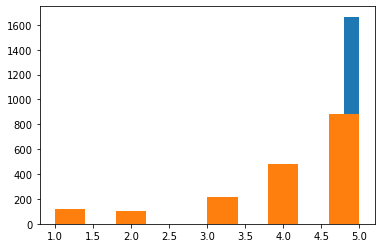

In [18]:
plt.hist(clf.predict(x_test))
plt.hist(y_test)

In [19]:
from sklearn.svm import SVC
clf = SVC()
clf.fit(x_train, y_train)
print('Training score is ' + str(clf.score(x_train, y_train)))
print('Testing score is ' + str(clf.score(x_test, y_test)))

Training score is 0.5094339622641509
Testing score is 0.4986134220743206


(array([122.,   0., 103.,   0.,   0., 214.,   0., 479.,   0., 885.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

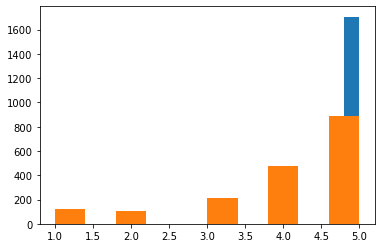

In [20]:
plt.hist(clf.predict(x_test))
plt.hist(y_test)

In [21]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)
print('Training score is ' + str(clf.score(x_train, y_train)))
print('Testing score is ' + str(clf.score(x_test, y_test)))

Training score is 1.0
Testing score is 0.43594009983361065


(array([122.,   0., 103.,   0.,   0., 214.,   0., 479.,   0., 885.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

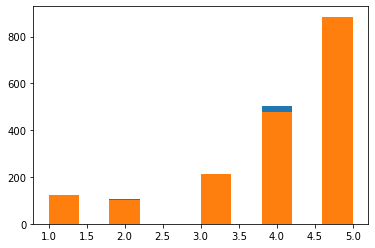

In [22]:
plt.hist(clf.predict(x_test))
plt.hist(y_test)

In [23]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(x_train, y_train)
print('Training score is ' + str(clf.score(x_train, y_train)))
print('Testing score is ' + str(clf.score(x_test, y_test)))

Training score is 1.0
Testing score is 0.5357737104825291


(array([122.,   0., 103.,   0.,   0., 214.,   0., 479.,   0., 885.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

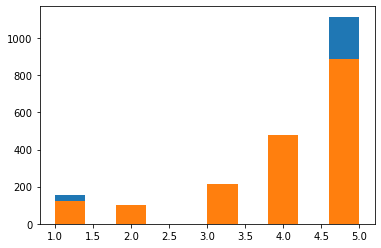

In [24]:
plt.hist(clf.predict(x_test))
plt.hist(y_test)

In [25]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier()
clf.fit(x_train, y_train)
print('Training score is ' + str(clf.score(x_train, y_train)))
print('Testing score is ' + str(clf.score(x_test, y_test)))

Training score is 0.6820199778024417
Testing score is 0.5385468663338879


(array([122.,   0., 103.,   0.,   0., 214.,   0., 479.,   0., 885.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

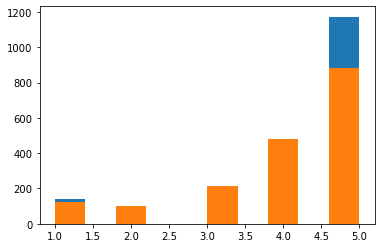

In [26]:
plt.hist(clf.predict(x_test))
plt.hist(y_test)

In [27]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(x_train, y_train)
print('Training score is ' + str(clf.score(x_train, y_train)))
print('Testing score is ' + str(clf.score(x_test, y_test)))

Training score is 0.4631367033817281
Testing score is 0.4426277081482023


(array([122.,   0., 103.,   0.,   0., 214.,   0., 479.,   0., 885.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

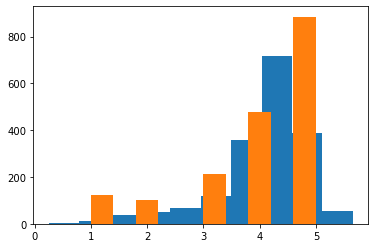

In [28]:
plt.hist(clf.predict(x_test))
plt.hist(y_test)

In [29]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [31]:
# text_clf = Pipeline([('clf', GradientBoostingClassifier())])
# parameters = {'clf__loss': ['deviance', 'exponential'], 'clf__learning_rate': [.1, .2, .3, .4], 
#               'clf__criterion': ['friedman_mse', 'squared_error', 'mse', 'mae']}

# metric =  "f1_macro"

# gs_clf = GridSearchCV(text_clf, param_grid = parameters, scoring = metric, cv = 5)
# gs_clf = gs_clf.fit(x_train, y_train)
# for param_name in gs_clf.best_params_:
#     print("{0}:\t{1}".format(param_name, gs_clf.best_params_[param_name]))


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 441, in fit
    self._check_params()
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 248, in _check_params
    self.loss_ = loss_class(self.n_classes_)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py", line 792, in __init__
    raise ValueError("{0:s} requires 2 classes; got {

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 441, in fit
    self._check_params()
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 248, in _check_params
    self.loss_ = loss_class(self.n_classes_)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py", line 792, in __init__
    raise ValueError("{0:s} requires 2 classes; got {

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 498, in fit
    n_stages = self._fit_stages(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 555, in _fit_stages
    raw_predictions = self._fit_stage(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 211, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  F

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 441, in fit
    self._check_params()
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 248, in _check_params
    self.loss_ = loss_class(self.n_classes_)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py", line 792, in __init__
    raise ValueError("{0:s} requires 2 classes; got {

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 441, in fit
    self._check_params()
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 248, in _check_params
    self.loss_ = loss_class(self.n_classes_)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py", line 792, in __init__
    raise ValueError("{0:s} requires 2 classes; got {

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 441, in fit
    self._check_params()
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 248, in _check_params
    self.loss_ = loss_class(self.n_classes_)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py", line 792, in __init__
    raise ValueError("{0:s} requires 2 classes; got {

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 441, in fit
    self._check_params()
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 248, in _check_params
    self.loss_ = loss_class(self.n_classes_)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py", line 792, in __init__
    raise ValueError("{0:s} requires 2 classes; got {

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 441, in fit
    self._check_params()
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 248, in _check_params
    self.loss_ = loss_class(self.n_classes_)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py", line 792, in __init__
    raise ValueError("{0:s} requires 2 classes; got {

clf__criterion:	mse
clf__learning_rate:	0.2
clf__loss:	deviance


In [33]:
clf = GradientBoostingClassifier(criterion = 'mse', learning_rate = 0.2, loss = 'deviance')
clf.fit(x_train, y_train)
print('Training score is ' + str(clf.score(x_train, y_train)))
print('Testing score is ' + str(clf.score(x_test, y_test)))

Training score is 0.746392896781354
Testing score is 0.5285635052689961
